In [1]:
using DataFrames, Gadfly, CSV, Plots, IJulia;

ArgumentError: Module Hiccup not found in current path.
Run `Pkg.add("Hiccup")` to install the Hiccup package.


In [20]:
raw = readtable("2018-05-21-1905.csv");
raw2 = readtable("2018-05-21-2145.csv");
raw = vcat(raw , raw2)
default(size = (1000, 600))
raw[:nodes] = raw[:node1_consumers] + raw[:node2_consumers]
raw[:time_ms] = raw[:time_ns] ./ 1000000
raw


,time_ns,n,partition_ancestors,node1_consumers,node2_consumers,chunks,nodes,time_ms
1,6057834617,900000,2,2,2,20000,4,6057.834617
2,9689311095,900000,2,2,2,20000,4,9689.311095
3,8635818011,900000,2,2,2,20000,4,8635.818011
4,9314639630,900000,2,2,2,20000,4,9314.63963
5,8138205104,900000,2,2,2,20000,4,8138.205104
6,6397670778,900000,2,2,2,20000,4,6397.670778
7,4609577350,900000,2,1,2,20000,3,4609.57735
8,6399186643,900000,2,1,2,20000,3,6399.186643
9,5819324208,900000,2,1,2,20000,3,5819.324208
10,7782746054,900000,2,1,2,20000,3,7782.746054


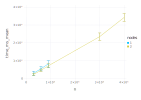

In [21]:
# fairly standard O(n log n)
data = deepcopy(raw)
# data = data[(data[:split].==split),:]
data = data[(data[:nodes].==1).|(data[:nodes].==2),[:n,:time_ms, :nodes]]
data = aggregate(data, [:nodes, :n], [ mean, maximum, minimum, std])

data[:time_ms_std_min] = data[:time_ms_mean] .- data[:time_ms_std]
data[:time_ms_std_max] = data[:time_ms_mean] .+ data[:time_ms_std]

Gadfly.plot(data, x=:n, y=:time_ms_mean, color=:nodes, ymin=:time_ms_std_min, ymax=:time_ms_std_max, Geom.line, Geom.errorbar, Scale.color_discrete)

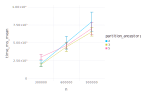

In [26]:
# fairly standard O(n log n)
data = deepcopy(raw)
# data = data[(data[:split].==split),:]
data = data[(data[:nodes].==2).&(data[:n].<3000000),[:n,:time_ms, :partition_ancestors]]
data = aggregate(data, [:partition_ancestors, :n], [ mean, maximum, minimum, std])

data[:time_ms_std_min] = data[:time_ms_mean] .- data[:time_ms_std]
data[:time_ms_std_max] = data[:time_ms_mean] .+ data[:time_ms_std]

Gadfly.plot(data, x=:n, y=:time_ms_mean, color=:partition_ancestors, ymin=:time_ms_std_min, ymax=:time_ms_std_max, Geom.line, Geom.errorbar, Scale.x_discrete, Scale.color_discrete)

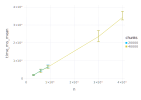

In [23]:
# fairly standard O(n log n)
data = deepcopy(raw)
# data = data[(data[:split].==split),:]
data = data[(data[:nodes].==2).&(data[:partition_ancestors].==3),[:n,:time_ms, :chunks]]
data = aggregate(data, [:chunks, :n], [ mean, maximum, minimum])

Gadfly.plot(data, x=:n, y=:time_ms_mean, color=:chunks, ymin=:time_ms_minimum, ymax=:time_ms_maximum, Geom.line, Geom.errorbar,  Scale.color_discrete)

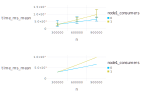

In [24]:
# difference between 2-consumer/1-node and 1-consumer/2-node
data = deepcopy(raw)
data10 = data[(data[:node1_consumers] .== 1).&(data[:node2_consumers] .== 0).|(data[:node2_consumers] .== 1).&(data[:node1_consumers] .== 0),:]
data10 = data10[:,[:node1_consumers, :n, :time_ms]]
data10 = aggregate(data10, [:node1_consumers, :n], [mean,minimum,maximum]) 
p1 = Gadfly.plot(data10, x=:n, y=:time_ms_mean, color=:node1_consumers, ymin=:time_ms_minimum, ymax=:time_ms_maximum, Scale.x_discrete, Geom.errorbar, Geom.line, Scale.color_discrete )
p2 = Gadfly.plot(data10, x=:n, y=:time_ms_mean, color=:node1_consumers, Geom.line, Scale.x_discrete, Scale.color_discrete )
vstack(p1,p2)
 